,Ім'я файлу,Кольорова модель,Формат,Кількість каналів,Розмір файлу (МБ),Ширина,Висота,Повний шлях,Зменшене зображення
0,aaron-burden-cGW1w-qLix8-unsplash.jpg,RGB,JPEG,3,1.91,3456,4608,photos\aaron-burden-cGW1w-qLix8-unsplash.jpg,
1,alejandro-alas-Zj0PsTsDPso-unsplash.jpg,RGB,JPEG,3,4.08,6000,4000,photos\alejandro-alas-Zj0PsTsDPso-unsplash.jpg,
2,benjamin-voros-AD6rn3vqG7o-unsplash.jpg,RGB,JPEG,3,2.28,3648,5472,photos\benjamin-voros-AD6rn3vqG7o-unsplash.jpg,
3,brandon-green-GEyXGTY2e9w-unsplash.jpg,RGB,JPEG,3,7.06,5961,3985,photos\brandon-green-GEyXGTY2e9w-unsplash.jpg,
4,bruno-leschi-El-egS_h_N4-unsplash.jpg,RGB,JPEG,3,2.86,3148,4527,photos\bruno-leschi-El-egS_h_N4-unsplash.jpg,
5,bryce-evans-choc7LYd98I-unsplash.jpg,RGB,JPEG,3,8.06,4912,7360,photos\bryce-evans-choc7LYd98I-unsplash.jpg,
6,hu-chen-60XLoOgwkfA-unsplash.jpg,RGB,JPEG,3,2.41,5203,3910,photos\hu-chen-60XLoOgwkfA-unsplash.jpg,
7,jon-flobrant-JU2MgHOHDsw-unsplash.jpg,RGB,JPEG,3,7.35,5472,3648,photos\jon-flobrant-JU2MgHOHDsw-unsplash.jpg,
8,kathy-toth-JaAVKyaOnKo-unsplash.jpg,RGB,JPEG,3,3.28,3456,5184,photos\kathy-toth-JaAVKyaOnKo-unsplash.jpg,
9,mel-R4bsmYIc6FI-unsplash.jpg,RGB,JPEG,3,3.33,4368,2912,photos\mel-R4bsmYIc6FI-unsplash.jpg,

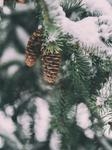
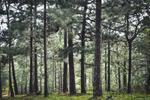
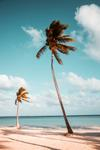
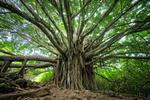
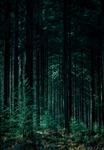
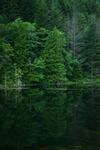
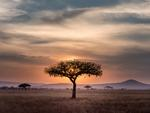
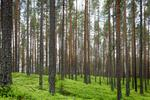
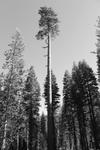
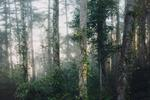
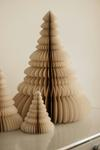
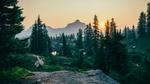
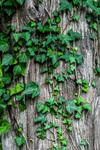
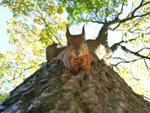

In [2]:
import os
import glob
import pandas as pd
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import base64
from IPython.display import HTML

pd.set_option('display.max_colwidth', None)

def get_thumbnail(path):
    try:
        img = Image.open(path)
        img.thumbnail((150, 150), Image.LANCZOS)
        return img
    except Exception as e:
        print(f"Помилка при створенні мініатюри для {path}: {e}")
        return None

def image_base64(im):
    with BytesIO() as buffer:
        im.save(buffer, 'JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def analyze_images(folder_path):
    file_paths = glob.glob(os.path.join(folder_path, "*"))
    image_data = []

    for file_path in file_paths:
        try:
            with Image.open(file_path) as img:
                file_info = {
                    "Ім'я файлу": os.path.basename(file_path),
                    "Кольорова модель": img.mode,
                    "Формат": img.format,
                    "Кількість каналів": len(img.getbands()),
                    "Розмір файлу (МБ)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    "Ширина": img.width,
                    "Висота": img.height,
                    "Повний шлях": file_path,
                    "Зменшене зображення": get_thumbnail(file_path),
                }
                image_data.append(file_info)
        except UnidentifiedImageError:
            print(f"Файл {file_path} не є зображенням. Пропускаємо.")
        except Exception as e:
            print(f"Помилка обробки файлу {file_path}: {e}")

    df = pd.DataFrame(image_data)
    return df

def display_images(df):
    return HTML(df.to_html(formatters={'Зменшене зображення': image_formatter}, escape=False))

folder_path = 'photos'
df = analyze_images(folder_path)
display_images(df)

In [5]:
import os
import random
from PIL import Image, ImageOps

def crop_to_square(image):
    width, height = image.size
    side_length = min(width, height)
    left = (width - side_length) // 2
    top = (height - side_length) // 2
    right = left + side_length
    bottom = top + side_length
    return image.crop((left, top, right, bottom))

def apply_random_filter(image):
    filters = [
        (255, 0, 0),    
        (0, 255, 0),    
        (0, 0, 255),    
        (255, 255, 0),  
        (255, 0, 255),  
        (0, 255, 255)   
    ]
    overlay_color = random.choice(filters)
    overlay = Image.new("RGB", image.size, overlay_color)
    return Image.blend(image, overlay, alpha=0.3)

def resize_image(image, size=(500, 500)):
    return image.resize(size, Image.LANCZOS)

def create_poster(folder_path, output_name, images_per_row, images_per_column):
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    if not file_paths:
        raise ValueError("У папці немає доступних зображень.")
    
    total_images = images_per_row * images_per_column
    selected_images = [random.choice(file_paths) for _ in range(total_images)]
    
    processed_images = []
    for image_path in selected_images:
        with Image.open(image_path) as img:
            img = crop_to_square(img)
            img = resize_image(img, size=(500, 500))
            img = apply_random_filter(img)
            processed_images.append(img)
    
    poster_width = images_per_row * 500
    poster_height = images_per_column * 500
    poster = Image.new("RGB", (poster_width, poster_height), (255, 255, 255))
    
    for i, img in enumerate(processed_images):
        x_offset = (i % images_per_row) * 500
        y_offset = (i // images_per_row) * 500
        poster.paste(img, (x_offset, y_offset))
    
    output_path = os.path.join(folder_path, output_name)
    poster.save(output_path)
    print(f"Постер збережено як: {output_path}")

folder_path = 'photos'

create_poster(folder_path, f"poster_1.jpg", images_per_row=4, images_per_column=3)


Постер збережено як: photos\poster_1.jpg


In [8]:
create_poster(folder_path, f"poster_2.jpg", images_per_row=2, images_per_column=2)

Постер збережено як: photos\poster_2.jpg


In [10]:
create_poster(folder_path, f"poster_3.jpg", images_per_row=3, images_per_column=2)

Постер збережено як: photos\poster_3.jpg
